In [1]:
import os
import sys

build_path = "/Users/romainegele/Documents/Argonne/deephyper-benchmark/lib/LCBench/build"
api_path = os.path.join(build_path, "LCBench")
# data_path = os.path.join(api_path, "data", "six_datasets_lw.json")
# data_path = os.path.join(api_path, "data", "bench_full.json")
data_path = os.path.join(api_path, "data", "data_2k.json")
cache_dir = os.path.join(api_path, "data")

sys.path.insert(0, api_path)

In [2]:
import os

import h5py

import matplotlib as mpl

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

width = 234.8775 # in pt.
width, height = set_size(width, fraction=0.8) # in inch
print(width, height)

fontsize = 9
mpl.rcParams.update({
    "figure.figsize": (width, height), 
    "figure.facecolor": 'white', 
    "figure.edgecolor": 'white',
    "savefig.dpi": 360, 
    "figure.subplot.bottom": 0.5, 
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": fontsize,
    "font.size": fontsize,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": fontsize-2,
    "xtick.labelsize": fontsize-2,
    "ytick.labelsize": fontsize-2,
    # tight layout,
    "figure.autolayout": True,
})

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from scipy.ndimage import uniform_filter1d

2.6 1.6068883707497268


## Loading The Data

In [5]:
from api import Benchmark as LCBenchBenchmark


bench = LCBenchBenchmark(data_path, cache=True, cache_dir=cache_dir)

dataset = "higgs"
num_elements = bench.get_number_of_configs(dataset)
print(f"{num_elements=}")

bench.get_queriable_tags(dataset)

==> Loading data...
==> Found cached data, loading...
==> Done.
num_elements=2000


['time',
 'epoch',
 'Train/loss',
 'Train/train_accuracy',
 'Train/val_accuracy',
 'Train/train_cross_entropy',
 'Train/val_cross_entropy',
 'Train/train_balanced_accuracy',
 'Train/val_balanced_accuracy',
 'Train/test_result',
 'Train/test_cross_entropy',
 'Train/test_balanced_accuracy',
 'Train/gradient_max',
 'Train/gradient_mean',
 'Train/gradient_median',
 'Train/gradient_std',
 'Train/gradient_q10',
 'Train/gradient_q25',
 'Train/gradient_q75',
 'Train/gradient_q90',
 'Train/layer_wise_gradient_max_layer_0',
 'Train/layer_wise_gradient_max_layer_1',
 'Train/layer_wise_gradient_max_layer_2',
 'Train/layer_wise_gradient_mean_layer_0',
 'Train/layer_wise_gradient_mean_layer_1',
 'Train/layer_wise_gradient_mean_layer_2',
 'Train/layer_wise_gradient_median_layer_0',
 'Train/layer_wise_gradient_median_layer_1',
 'Train/layer_wise_gradient_median_layer_2',
 'Train/layer_wise_gradient_std_layer_0',
 'Train/layer_wise_gradient_std_layer_1',
 'Train/layer_wise_gradient_std_layer_2',
 'Trai

In [4]:
print(bench.get_openml_task_ids())
print(bench.get_dataset_names())

[168868, 34539, 167104, 189908, 3945, 168335, 126025, 189354, 189866, 126029, 167184, 189905, 168908, 167185, 167201, 7593, 167161, 189873, 168910, 168329, 167200, 168330, 189862, 189909, 167181, 167149, 167152, 126026, 167083, 167190, 189906, 146212, 189865, 167168, 168331]
['APSFailure', 'Amazon_employee_access', 'Australian', 'Fashion-MNIST', 'KDDCup09_appetency', 'MiniBooNE', 'adult', 'airlines', 'albert', 'bank-marketing', 'blood-transfusion-service-center', 'car', 'christine', 'cnae-9', 'connect-4', 'covertype', 'credit-g', 'dionis', 'fabert', 'helena', 'higgs', 'jannis', 'jasmine', 'jungle_chess_2pcs_raw_endgame_complete', 'kc1', 'kr-vs-kp', 'mfeat-factors', 'nomao', 'numerai28.6', 'phoneme', 'segment', 'shuttle', 'sylvine', 'vehicle', 'volkert']


In [5]:
bench.get_config("higgs", "0")

{'batch_size': 71,
 'imputation_strategy': 'mean',
 'learning_rate_scheduler': 'cosine_annealing',
 'loss': 'cross_entropy_weighted',
 'network': 'shapedmlpnet',
 'max_dropout': 0.025926231827891333,
 'normalization_strategy': 'standardize',
 'optimizer': 'sgd',
 'cosine_annealing_T_max': 50,
 'cosine_annealing_eta_min': 1e-08,
 'activation': 'relu',
 'max_units': 293,
 'mlp_shape': 'funnel',
 'num_layers': 3,
 'learning_rate': 0.0018243300267253295,
 'momentum': 0.21325193168301043,
 'weight_decay': 0.020472816917443872}

In [8]:
bench.query("APSFailure", "Train/val_cross_entropy", str(10))

[0.7249732017517091,
 0.4435122311115265,
 0.323141485452652,
 0.2639375329017639,
 0.24291884899139404,
 0.2213446944952011,
 0.19933469593524933,
 0.19370828568935394,
 0.18786756694316864,
 0.1926189213991165,
 0.1818334609270096,
 0.18417048454284668,
 0.18955425918102264,
 0.17541398108005524,
 0.1830999106168747,
 0.17523764073848724,
 0.1751064509153366,
 0.16889062523841858,
 0.174652099609375,
 0.17658771574497226,
 0.1825682520866394,
 0.18197843432426453,
 0.1758401244878769,
 0.17521195113658905,
 0.1698717474937439,
 0.17540644109249115,
 0.17195770144462585,
 0.17232128977775574,
 0.17423522472381592,
 0.17447279393672946,
 0.1720656305551529,
 0.17515476047992706,
 0.16880083084106445,
 0.17342440783977509,
 0.1672104299068451,
 0.17224018275737762,
 0.16912390291690824,
 0.17660102248191833,
 0.17008624970912933,
 0.17338477075099945,
 0.1739778369665146,
 0.1720881164073944,
 0.176321342587471,
 0.17369936406612396,
 0.17378228902816772,
 0.1723652482032776,
 0.1735209

## Stability of the ranking

M.shape=(1000, 50)
R.shape=(1000, 50)


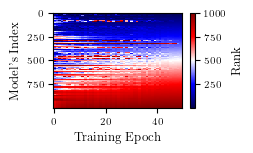

In [8]:
from scipy.stats import rankdata

# dataset = "Fashion-MNIST"
# dataset = "higgs"
# dataset = "adult"
# dataset = "jasmine"
# dataset = "vehicle"
dataset = "APSFailure"

random_state = 42
rs = np.random.RandomState(random_state)
num_models = 1_000

selection = rs.choice(np.arange(bench.get_number_of_configs(dataset)), size=num_models, replace=False)

M = []
for i, k in enumerate(selection):
    y = bench.query(dataset, "Train/val_cross_entropy", k)[1:51]
    y = np.asarray(y).reshape(1, -1)
    C = np.mean(y, axis=0).tolist()
    M.append(C)
M = np.asarray(M)
print(f"{M.shape=}")

# ranking matrix per step
R = rankdata(M, axis=0)
print(f"{R.shape=}")

idx_sorting = np.argsort(R[:,-1])

plt.figure()
plt.imshow(R[idx_sorting], cmap="seismic", interpolation="nearest", aspect="auto")
plt.colorbar(label="Rank")
plt.xlabel("Training Epoch")
plt.ylabel("Model's Index")
plt.tight_layout()
plt.savefig(f"heatmap_ranks_lcbench_{dataset}.png")
plt.show()

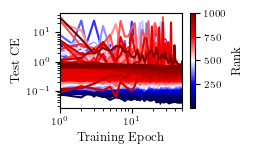

In [9]:
cmap = mpl.colormaps["seismic"]

x = np.arange(1,51)
fig = plt.figure()
ax = plt.gca()

for i in range(M.shape[0]):
    plt.plot(x, M[idx_sorting][i], color=cmap(i/M.shape[0]))
    
plt.xscale("log")
plt.yscale("log")
plt.xlim(1,50)
plt.xlabel(r"Training Epoch")
plt.ylabel("Test CE")
norm = mpl.cm.ScalarMappable(norm=None, cmap=cmap)
norm.set_clim(1, 1000)
cb = plt.colorbar(norm, ax=ax, label="Rank")
plt.tight_layout()
plt.savefig(f"ranking_curves_lcbench_{dataset}.png")
plt.show()

  0%|          | 0/35 [00:00<?, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


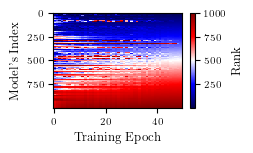

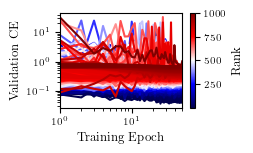

M.shape=(1000, 50)
R.shape=(1000, 50)


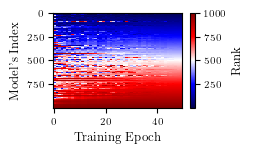

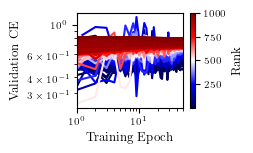

M.shape=(1000, 50)
R.shape=(1000, 50)


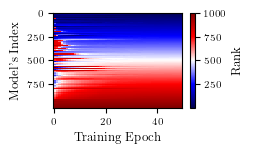

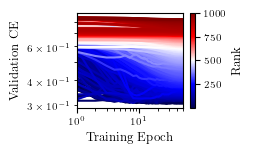

M.shape=(1000, 50)
R.shape=(1000, 50)


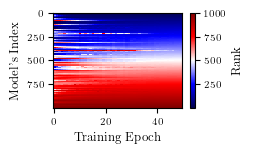

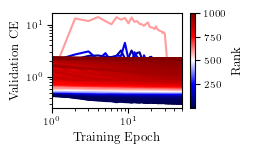

M.shape=(1000, 50)
R.shape=(1000, 50)


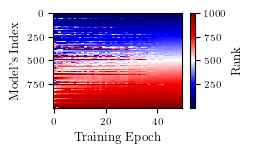

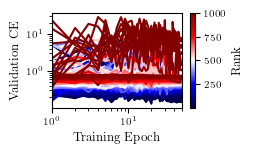

M.shape=(1000, 50)
R.shape=(1000, 50)


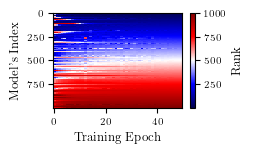

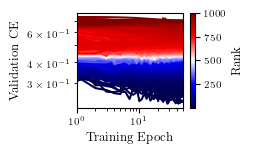

M.shape=(1000, 50)
R.shape=(1000, 50)


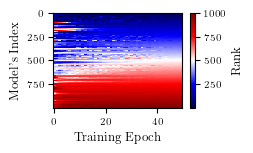

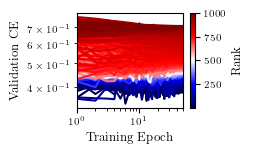

M.shape=(1000, 50)
R.shape=(1000, 50)


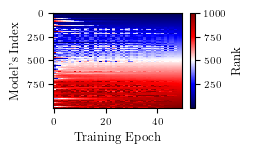

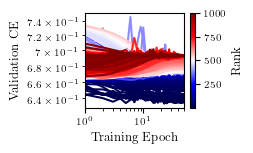

M.shape=(1000, 50)
R.shape=(1000, 50)


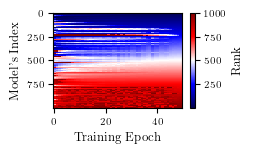

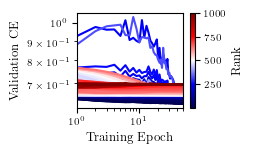

M.shape=(1000, 50)
R.shape=(1000, 50)


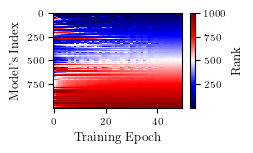

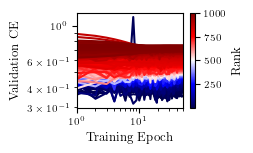

M.shape=(1000, 50)
R.shape=(1000, 50)


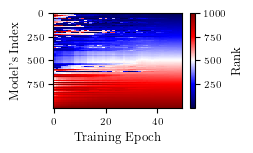

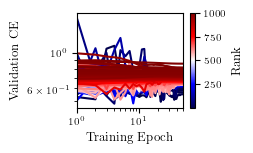

M.shape=(1000, 50)
R.shape=(1000, 50)


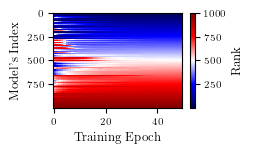

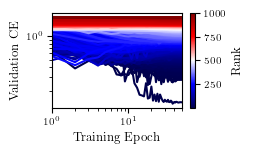

M.shape=(1000, 50)
R.shape=(1000, 50)


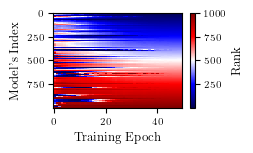

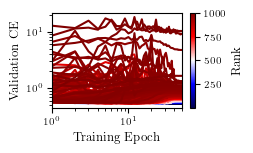

M.shape=(1000, 50)
R.shape=(1000, 50)


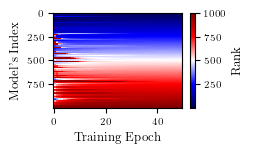

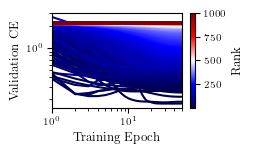

M.shape=(1000, 50)
R.shape=(1000, 50)


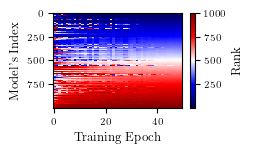

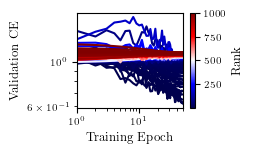

M.shape=(1000, 50)
R.shape=(1000, 50)


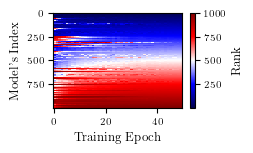

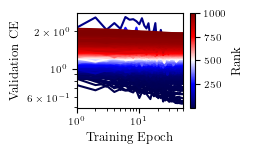

M.shape=(1000, 50)
R.shape=(1000, 50)


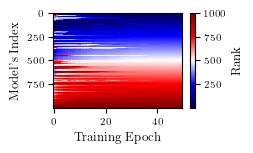

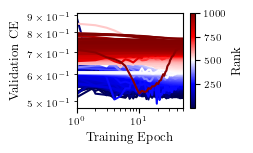

M.shape=(1000, 50)
R.shape=(1000, 50)


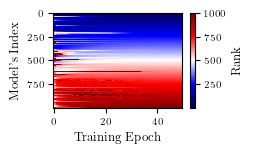

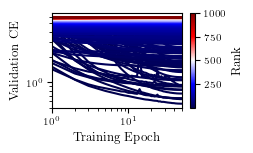

M.shape=(1000, 50)
R.shape=(1000, 50)


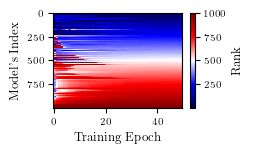

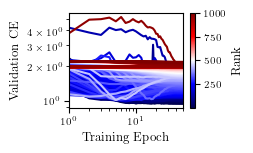

M.shape=(1000, 50)
R.shape=(1000, 50)


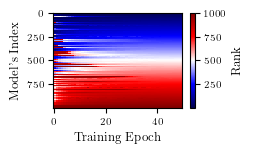

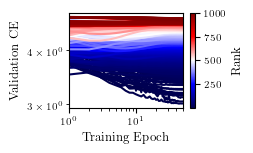

M.shape=(1000, 50)
R.shape=(1000, 50)


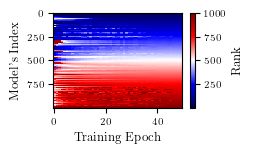

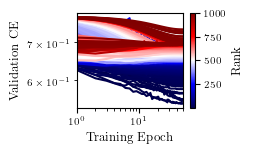

M.shape=(1000, 50)
R.shape=(1000, 50)


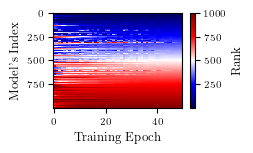

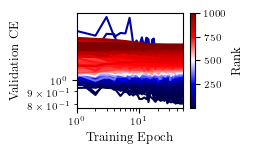

M.shape=(1000, 50)
R.shape=(1000, 50)


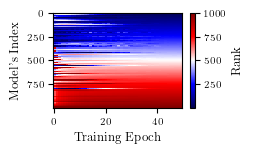

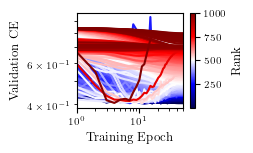

M.shape=(1000, 50)
R.shape=(1000, 50)


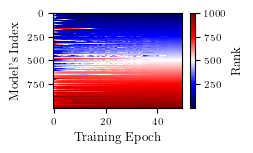

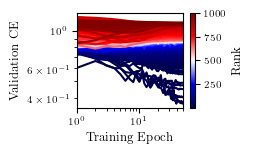

M.shape=(1000, 50)
R.shape=(1000, 50)


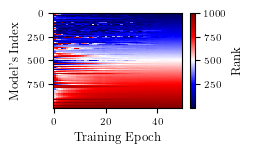

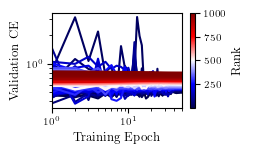

M.shape=(1000, 50)
R.shape=(1000, 50)


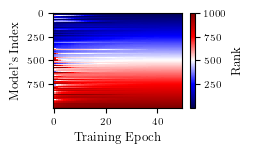

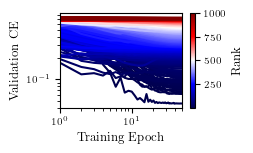

M.shape=(1000, 50)
R.shape=(1000, 50)


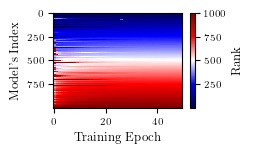

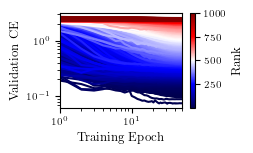

M.shape=(1000, 50)
R.shape=(1000, 50)


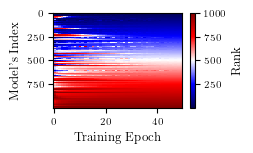

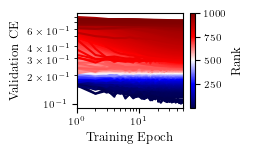

M.shape=(1000, 50)
R.shape=(1000, 50)


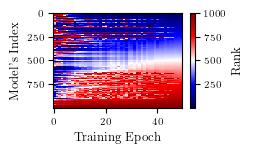

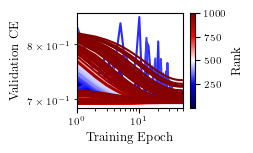

M.shape=(1000, 50)
R.shape=(1000, 50)


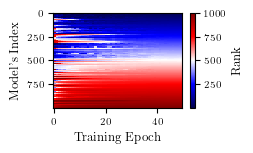

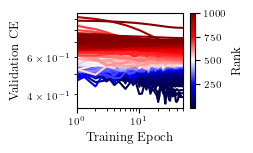

M.shape=(1000, 50)
R.shape=(1000, 50)


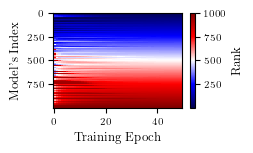

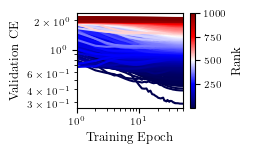

M.shape=(1000, 50)
R.shape=(1000, 50)


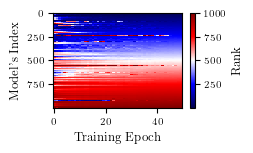

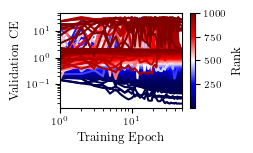

M.shape=(1000, 50)
R.shape=(1000, 50)


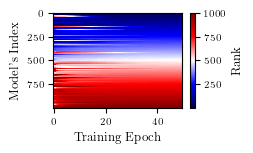

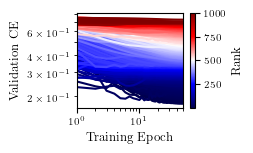

M.shape=(1000, 50)
R.shape=(1000, 50)


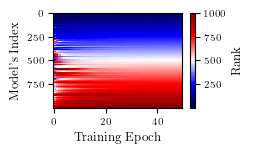

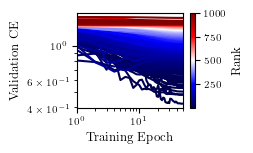

M.shape=(1000, 50)
R.shape=(1000, 50)


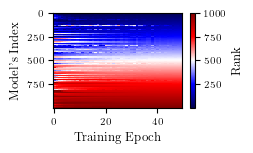

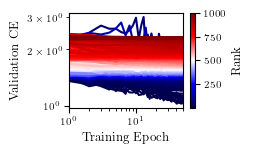

In [14]:
dataset_list = bench.get_dataset_names()
for dataset in tqdm(dataset_list):
    from scipy.stats import rankdata

    random_state = 42
    rs = np.random.RandomState(random_state)
    num_models = 1_000

    selection = rs.choice(np.arange(bench.get_number_of_configs(dataset)), size=num_models, replace=False)
    
    # Collect the data
    M = []
    for i, k in enumerate(selection):
        y = bench.query(dataset, "Train/val_cross_entropy", k)[1:51]
        y = np.asarray(y).reshape(1, -1)
        C = np.mean(y, axis=0).tolist()
        M.append(C)
    M = np.asarray(M)
    print(f"{M.shape=}")

    # ranking matrix per step
    R = rankdata(M, axis=0)
    print(f"{R.shape=}")

    idx_sorting = np.argsort(R[:,-1])
    
    # Stability of Ranking
    plt.figure()
    plt.imshow(R[idx_sorting], cmap="seismic", interpolation="nearest", aspect="auto")
    plt.colorbar(label="Rank")
    plt.xlabel("Training Epoch")
    plt.ylabel("Model's Index")
    plt.tight_layout()
    plt.savefig(f"lcbench-plots/heatmap_ranks_lcbench_{dataset}.png")
    plt.show()
    
    # Curves
    cmap = mpl.colormaps["seismic"]

    x = np.arange(1,51)
    fig = plt.figure()
    ax = plt.gca()

    for i in range(M.shape[0]):
        plt.plot(x, M[idx_sorting][i], color=cmap(i/M.shape[0]))

    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(1,50)
    plt.xlabel(r"Training Epoch")
    plt.ylabel("Validation CE")
    norm = mpl.cm.ScalarMappable(norm=None, cmap=cmap)
    norm.set_clim(1, 1000)
    cb = plt.colorbar(norm, ax=ax, label="Rank")
    plt.tight_layout()
    plt.savefig(f"lcbench-plots/ranking_curves_lcbench_{dataset}.png")
    plt.show()

In [11]:
text = r"""
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/lcbench/curves/ranking_curves_lcbench_XXX.png}
        \caption{YYY}
        \label{fig:ranking-curves-top10-XXX}
    \end{subfigure}"""

text = r"""
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/lcbench/curves/heatmap_ranks_lcbench_XXX.png}
        \caption{YYY}
        \label{fig:heatmap-top10-XXX}
    \end{subfigure}"""

In [12]:
for dataset in sorted(dataset_list):
    print(text.replace("XXX", dataset).replace("YYY", dataset.replace("_", " ").replace("-", " ")), end="")


    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/lcbench/curves/heatmap_ranks_lcbench_APSFailure.png}
        \caption{APSFailure}
        \label{fig:heatmap-top10-APSFailure}
    \end{subfigure}
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/lcbench/curves/heatmap_ranks_lcbench_Amazon_employee_access.png}
        \caption{Amazon employee access}
        \label{fig:heatmap-top10-Amazon_employee_access}
    \end{subfigure}
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/lcbench/curves/heatmap_ranks_lcbench_Australian.png}
        \caption{Australian}
        \label{fig:heatmap-top10-Australian}
    \end{subfigure}
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/lcbench/curves/heatmap_ranks_lcbench_Fashion-MNIST.png}
        \caption{Fashi

In [42]:
len(dataset_list)

35